In [108]:
# Analyzing a strategy that gives a 40% win rate, where your RR is 1:2
# comparing it to SPY's return
# calculating the sharpe ratio for SPY & strategy
# calculating drawdown of SPY & strategy 
# plotting the returns

In [109]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt

In [110]:
spy = yf.download("SPY", start= "2019-01-01")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [111]:
spy_ret = nifty/nifty.shift()-1
spy_ret = nifty_ret.dropna()
spy_ret

Date
2019-01-03   -0.023863
2019-01-04    0.033496
2019-01-07    0.007885
2019-01-08    0.009395
2019-01-09    0.004673
                ...   
2024-06-11    0.002408
2024-06-12    0.008213
2024-06-13    0.002013
2024-06-14    0.000608
2024-06-17    0.007959
Name: Adj Close, Length: 1373, dtype: float64

In [112]:
sharpe = spy_ret.mean() / spy_ret.std()*np.sqrt(252)
sharpe

0.8849517076419768

In [113]:
pattern = [-0.01, -0.01, -0.01, 0.02, 0.02]


In [114]:
data = {}
pattern_length = len(pattern)
for i, days in enumerate(spy_ret.index):
    data[days] = pattern[i % pattern_length]

In [115]:
strat = pd.Series(data)
strat

2019-01-03   -0.01
2019-01-04   -0.01
2019-01-07   -0.01
2019-01-08    0.02
2019-01-09    0.02
              ... 
2024-06-11    0.02
2024-06-12    0.02
2024-06-13   -0.01
2024-06-14   -0.01
2024-06-17   -0.01
Length: 1373, dtype: float64

In [116]:
# Convert the data dictionary to a Series
strat = pd.Series(data, name="Strategy")

# Combine nifty_ret and strat into one DataFrame
combined_df = pd.concat([nifty_ret, strat], axis=1)

# Rename the columns for clarity
combined_df.columns = ["SPY_Returns", "Strategy"]

combined_df 

,SPY_Returns,Strategy
2019-01-03,-0.023863,-0.01
2019-01-04,0.033496,-0.01
2019-01-07,0.007885,-0.01
2019-01-08,0.009395,0.02
2019-01-09,0.004673,0.02
...,...,...
2024-06-11,0.002408,0.02
2024-06-12,0.008213,0.02
2024-06-13,0.002013,-0.01
2024-06-14,0.000608,-0.01


<Axes: >

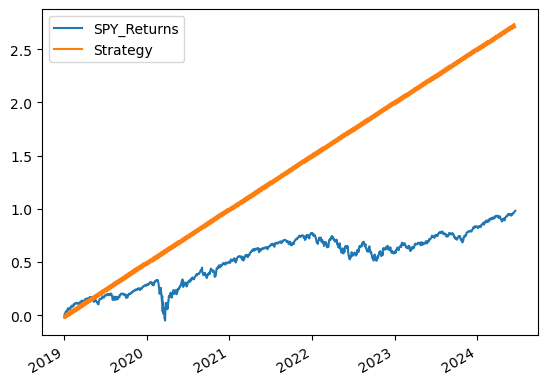

In [117]:
combined_df.cumsum().plot()

In [118]:
sharpe_strat = strat.mean()/strat.std()*np.sqrt(252)

In [119]:
sharpe_strat

2.1319295050531926

In [120]:
def drawdown(x):
    return x/x.expanding(min_periods = 1).max()-1

In [121]:
max_drawdown_Strat = drawdown(strat).min()
max_drawdown_Strat

-1.5

In [122]:
max_drawdown_SPY = drawdown(nifty_ret).min()
max_drawdown_SPY

-2.8490178058265867